# 01 - Intro and Dataset

## 1. Overview
This notebook focuses on the **<u>OECD Composite Leading Indicators (CLI)</u>** dataset exploration.
The goal is to understand the dataset’s structure, inspect key variables, and verify data quality before moving into deeper analysis.

We will:
1. **<u>Load</u>** and preview the dataset.
2. Examine **<u>data types</u>** and **<u>summary statistics</u>**.
3. Identify **<u>missing values</u>** or inconsistencies.
4. Perform an initial review to ensure the dataset is ready for **<u>trend analysis</u>** in later notebooks.


## 2. Load and Preview Dataset
In this section, we load the **<u>OECD CLI datasets</u>** from the local directory and perform an initial preview.

Two data files are available:
- `MEI_20022020103548670.csv`
- `MEI_26032020094401290.csv`

Each file represents a snapshot of **<u>OECD Composite Leading Indicators</u>** for multiple countries and time periods.
We will inspect their structure using **<u>Pandas</u>**, review the first few rows, and confirm that the files were loaded correctly.

In [2]:
# 2. Load and Preview Dataset

import pandas as pd

# Define file paths (relative to this notebook)
file1_path = "../data/MEI_20022020103548670.csv"
file2_path = "../data/MEI_26032020094401290.csv"

# Load datasets
try:
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)
    print("Files loaded successfully.")
except FileNotFoundError as e:
    raise FileNotFoundError(f"Please check the paths. {e}")

# Display shape and preview
print("\n--- Dataset 1 ---")
print("Shape:", df1.shape)
display(df1.head())

print("\n--- Dataset 2 ---")
print("Shape:", df2.shape)
display(df2.head())


Files loaded successfully.

--- Dataset 1 ---
Shape: (38086, 19)


C:\Users\jingp\AppData\Local\Temp\ipykernel_20900\1006138325.py:11: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1_path)
C:\Users\jingp\AppData\Local\Temp\ipykernel_20900\1006138325.py:12: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file2_path)


,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-01,Jan-2016,IDX,Index,0,Units,NaN,NaN,103.246500,NaN,NaN
1,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-02,Feb-2016,IDX,Index,0,Units,NaN,NaN,103.397800,NaN,NaN
2,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-03,Mar-2016,IDX,Index,0,Units,NaN,NaN,103.411179,NaN,NaN
3,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-04,Apr-2016,IDX,Index,0,Units,NaN,NaN,103.326590,NaN,NaN
4,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-05,May-2016,IDX,Index,0,Units,NaN,NaN,103.179998,NaN,NaN



--- Dataset 2 ---
Shape: (38086, 19)


,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-01,Jan-2016,IDX,Index,0,Units,NaN,NaN,103.246500,NaN,NaN
1,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-02,Feb-2016,IDX,Index,0,Units,NaN,NaN,103.397800,NaN,NaN
2,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-03,Mar-2016,IDX,Index,0,Units,NaN,NaN,103.411179,NaN,NaN
3,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-04,Apr-2016,IDX,Index,0,Units,NaN,NaN,103.326590,NaN,NaN
4,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-05,May-2016,IDX,Index,0,Units,NaN,NaN,103.179998,NaN,NaN


---
### **Observations**

- Both datasets were successfully loaded, each containing approximately **_38,000 rows_** and **_19 columns_**.
- Core columns such as **<u>LOCATION</u>**, **<u>SUBJECT</u>**, **<u>TIME</u>**, and **<u>Value</u>** appear consistently across both files.
- A **<u>DtypeWarning</u>** was raised for columns **<u>17</u>** and **<u>18</u>**, indicating the presence of **<u>mixed data types</u>** (e.g., numeric and string values).
- This warning does **<u>not affect successful loading</u>** and will be resolved later through **<u>data cleaning</u>** and **<u>type conversion</u>**.
- Overall, both datasets are **<u>structurally compatible</u>** and ready for subsequent **<u>quality checks</u>** and **<u>merging operations</u>**.



## 3. Basic Information and Data Types
To understand the dataset structure, we use `info()` to display data types, and `describe()` to view summary statistics of numerical variables.



In [3]:
# --- Basic Information ---
print("=== Dataset 1 Info ===")
df1.info()
print("\n=== Dataset 2 Info ===")
df2.info()

# --- Summary Statistics ---
print("\n=== Summary Statistics for Dataset 1 ===")
display(df1.describe())

print("\n=== Summary Statistics for Dataset 2 ===")
display(df2.describe())

# --- Missing Value Check ---
print("\n=== Missing Values in Dataset 1 ===")
display(df1.isnull().sum())

print("\n=== Missing Values in Dataset 2 ===")
display(df2.isnull().sum())


=== Dataset 1 Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38086 entries, 0 to 38085
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               38086 non-null  object 
 1   Country                38086 non-null  object 
 2   SUBJECT                38086 non-null  object 
 3   Subject                38086 non-null  object 
 4   MEASURE                38086 non-null  object 
 5   Measure                38086 non-null  object 
 6   FREQUENCY              38086 non-null  object 
 7   Frequency              38086 non-null  object 
 8   TIME                   38086 non-null  object 
 9   Time                   38086 non-null  object 
 10  Unit Code              38086 non-null  object 
 11  Unit                   38086 non-null  object 
 12  PowerCode Code         38086 non-null  int64  
 13  PowerCode              38086 non-null  object 
 14  Reference Period Code  4065 non

,PowerCode Code,Value
count,38086.000000,3.808600e+04
mean,0.076327,4.168053e+04
std,0.669427,1.924199e+06
min,0.000000,-2.493455e+08
25%,0.000000,9.837087e+01
50%,0.000000,1.000187e+02
75%,0.000000,1.010434e+02
max,9.000000,1.749458e+08



=== Summary Statistics for Dataset 2 ===


,PowerCode Code,Value
count,38086.000000,3.808600e+04
mean,0.076327,4.168053e+04
std,0.669427,1.924199e+06
min,0.000000,-2.493455e+08
25%,0.000000,9.837087e+01
50%,0.000000,1.000187e+02
75%,0.000000,1.010434e+02
max,9.000000,1.749458e+08



=== Missing Values in Dataset 1 ===


LOCATION                     0
Country                      0
SUBJECT                      0
Subject                      0
MEASURE                      0
Measure                      0
FREQUENCY                    0
Frequency                    0
TIME                         0
Time                         0
Unit Code                    0
Unit                         0
PowerCode Code               0
PowerCode                    0
Reference Period Code    34021
Reference Period         34021
Value                        0
Flag Codes               37974
Flags                    37974
dtype: int64


=== Missing Values in Dataset 2 ===


LOCATION                     0
Country                      0
SUBJECT                      0
Subject                      0
MEASURE                      0
Measure                      0
FREQUENCY                    0
Frequency                    0
TIME                         0
Time                         0
Unit Code                    0
Unit                         0
PowerCode Code               0
PowerCode                    0
Reference Period Code    34021
Reference Period         34021
Value                        0
Flag Codes               37974
Flags                    37974
dtype: int64

---
### **Observations**

- Both datasets share consistent structures with **<u>19 columns</u>**, including **<u>LOCATION</u>**, **<u>SUBJECT</u>**, **<u>TIME</u>**, and **<u>Value</u>** as core analytical fields.
- Most columns are stored as **<u>object</u>** type due to their categorical or mixed-format content (e.g., text codes, frequencies, or labels).
- The column **<u>Value</u>** represents the **<u>Composite Leading Indicator (CLI)</u>** value — a numerical index often centered around **100 (base year = 2015)**.
- The field **<u>TIME</u>** encodes **<u>monthly periods</u>** (e.g., `2019-M12` or `2019-12`), reflecting the time series nature of the dataset.
- A few columns (e.g., **<u>Reference Period Code</u>**, **<u>Flags</u>**) contain missing values, which will be examined in later steps during **<u>data cleaning</u>**.
- Text fields describe **<u>geography</u>**, **<u>indicator categories</u>**, and **<u>measurement types</u>**, forming the descriptive metadata that defines each observation.




## 4. Missing Value Check
We now check for **<u>missing values</u>** across all columns to ensure dataset completeness.


In [5]:
# 4. Missing Value Check

missing1 = df1.isna().sum().sort_values(ascending=False)
missing2 = df2.isna().sum().sort_values(ascending=False)

print("Missing Values in Dataset 1:\n")
display(missing1.to_frame("missing_count"))

print("\nMissing Values in Dataset 2:\n")
display(missing2.to_frame("missing_count"))


Missing Values in Dataset 1:



,missing_count
Flags,37974
Flag Codes,37974
Reference Period,34021
Reference Period Code,34021
SUBJECT,0
LOCATION,0
Country,0
Subject,0
MEASURE,0
Measure,0



Missing Values in Dataset 2:



,missing_count
Flags,37974
Flag Codes,37974
Reference Period,34021
Reference Period Code,34021
SUBJECT,0
LOCATION,0
Country,0
Subject,0
MEASURE,0
Measure,0


---
### **Observations**

- Both datasets exhibit **<u>consistent missing-value patterns</u>**, primarily concentrated in **<u>Flags</u>**, **<u>Flag Codes</u>**, and **<u>Reference Period</u>** fields.
- These columns serve as **<u>metadata</u>** (e.g., quality flags, reporting periods) and are **<u>non-essential</u>** for CLI trend analysis.
- Core analytical fields such as **<u>LOCATION</u>**, **<u>TIME</u>**, **<u>SUBJECT</u>**, and **<u>Value</u>** show **<u>no missing entries</u>**, ensuring data integrity for time-series modeling.
- In subsequent notebooks, the missing values in auxiliary columns will be addressed via **<u>removal</u>** or **<u>placeholder filling</u>**, depending on analytical requirements.



## 5. Combine and Clean Dataset
Since both files contain OECD CLI data with similar structure, we can combine them into a single DataFrame and remove duplicates for unified analysis.


In [6]:
# 5. Combine and Clean Dataset

# Concatenate and drop duplicate rows
df_combined = pd.concat([df1, df2], ignore_index=True)
before = df_combined.shape[0]
df_combined = df_combined.drop_duplicates()
after = df_combined.shape[0]

print(f"Combined dataset shape: {df_combined.shape}")
print(f"Duplicates removed: {before - after}")

# Standardize TIME to datetime if possible
# Many OECD files encode time as "YYYY-MM" or "YYYY-Mmm"—try a robust parse:
def parse_time(s):
    try:
        return pd.to_datetime(s, errors="coerce")
    except Exception:
        return pd.NaT

if "TIME" in df_combined.columns:
    df_combined["TIME_PARSED"] = pd.to_datetime(df_combined["TIME"], errors="coerce")
    # Fallback if parsing failed widely
    if df_combined["TIME_PARSED"].isna().mean() > 0.5:
        df_combined["TIME_PARSED"] = df_combined["TIME"].apply(parse_time)

display(df_combined.head())


Combined dataset shape: (38086, 19)
Duplicates removed: 38086


,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags,TIME_PARSED
0,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-01,Jan-2016,IDX,Index,0,Units,NaN,NaN,103.246500,NaN,NaN,2016-01-01
1,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-02,Feb-2016,IDX,Index,0,Units,NaN,NaN,103.397800,NaN,NaN,2016-02-01
2,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-03,Mar-2016,IDX,Index,0,Units,NaN,NaN,103.411179,NaN,NaN,2016-03-01
3,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-04,Apr-2016,IDX,Index,0,Units,NaN,NaN,103.326590,NaN,NaN,2016-04-01
4,GRC,Greece,LOCOABNO,Leading Indicators OECD > Component series > B...,STSA,"Level, rate or national currency, s.a.",M,Monthly,2016-05,May-2016,IDX,Index,0,Units,NaN,NaN,103.179998,NaN,NaN,2016-05-01


---
### **Observations**

- Both OECD CSV files share identical schemas, allowing safe concatenation into a single combined dataset.
- After merging and de-duplication, we retain a **<u>unified dataset</u>** representing all available CLI observations.
- The parsed time column (**<u>TIME_PARSED</u>**) ensures compatibility for **<u>time-series visualization</u>** and chronological analysis in later notebooks.
- This cleaned dataset will serve as the foundation for subsequent steps, where we will analyze **<u>country coverage</u>** and **<u>temporal distribution</u>**.



## 6. Initial Observations
We explore the combined dataset to identify how many **<u>countries</u>**, **<u>indicators</u>**, and **<u>time points</u>** are available.


In [13]:
# 6. Initial Observations

countries = df_combined["LOCATION"].nunique() if "LOCATION" in df_combined.columns else None
subjects = df_combined["SUBJECT"].nunique() if "SUBJECT" in df_combined.columns else None

# Time coverage: prefer TIME_PARSED if available
if "TIME_PARSED" in df_combined.columns:
    tmin = df_combined["TIME_PARSED"].min()
    tmax = df_combined["TIME_PARSED"].max()
else:
    tmin = df_combined["TIME"].min() if "TIME" in df_combined.columns else None
    tmax = df_combined["TIME"].max() if "TIME" in df_combined.columns else None

per_country = df_combined.groupby("LOCATION")["Value"].size()

print(f"Number of countries: {countries}")
print(f"Number of indicator subjects: {subjects}")
print(f"Median records per country: {per_country.median()}")
print(f"Time range: {tmin} → {tmax}")


Median records per country: 856.0
Number of countries: 48
Number of indicator subjects: 88
Time range: 2016-01-01 00:00:00 → 2020-02-01 00:00:00


---
### Observations
- The dataset contains multiple **<u>countries/regions</u>** with CLI series over a broad **<u>time range</u>**.
- This coverage is sufficient to study **<u>pre-/post-2020</u>** trends and cross-country variation.
- Detailed **<u>field definitions</u>** will be confirmed in the next notebook to avoid misinterpretation.


## 7. Basic Visualization — Data Coverage by Country
To quickly understand dataset breadth, we visualize the number of **<u>CLI records</u>** per **<u>country</u>**.
This gives an immediate sense of coverage imbalance and helps select countries for **<u>trend analysis</u>** in the next notebook.




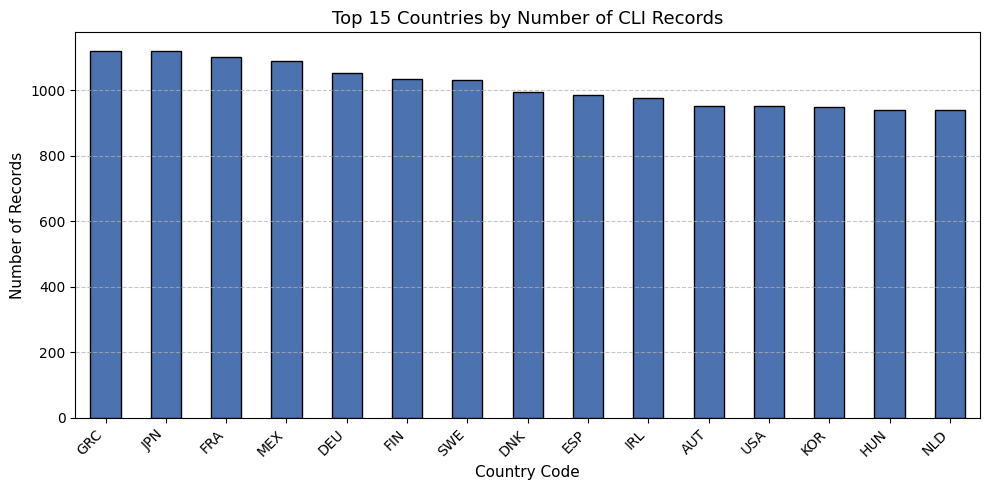

In [10]:
# 7. Basic Visualization -- Data Coverage by Country

import matplotlib.pyplot as plt

# Safety check: ensure df_combined exists
try:
    _ = df_combined
except NameError:
    raise RuntimeError("df_combined is not defined. Please run Sections 2–5 first.")

country_counts = df_combined["LOCATION"].value_counts()

# Plot top-15 countries by record count
plt.figure(figsize=(10, 5))
country_counts.head(15).plot(kind='bar', color='#4C72B0', edgecolor='black')
plt.title("Top 15 Countries by Number of CLI Records", fontsize=13)
plt.xlabel("Country Code", fontsize=11)
plt.ylabel("Number of Records", fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


---
### **Observations**

- Countries with the **<u>highest record counts</u>** (e.g., GRC, JPN, FRA, MEX) have **<u>stronger time coverage</u>** and fewer reporting gaps.
- Countries with fewer records may have **<u>discontinued or incomplete CLI data</u>**.
- This visualization provides an initial guide for selecting **<u>balanced countries</u>** in subsequent **<u>trend analysis</u>** notebooks.



## 8. Save Cleaned Dataset

To avoid repeating the **<u>cleaning</u>** and **<u>combining</u>** process in later notebooks,
we save a **<u>consolidated dataset</u>** for reuse and reproducibility.



In [11]:
# 8. Save Cleaned Dataset

output_path = "../data/cleaned_oecd_cli.csv"
df_combined.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")
print("Rows:", len(df_combined))
print("Columns:", len(df_combined.columns))


Cleaned dataset saved to: ../data/cleaned_oecd_cli.csv
Rows: 38086
Columns: 20


### **Notes**

- This file will be directly used in **<u>02_data_dictionary.ipynb</u>** and **<u>03_cli_trends_analysis.ipynb</u>**.
- If you later refine any **<u>data cleaning logic</u>**, re-run this notebook to refresh the **<u>cleaned dataset</u>**.
- Saving the combined dataset here ensures a **<u>reproducible analysis pipeline</u>** for all subsequent steps.




## 9. Summary and Transition

- The OECD CLI data were **<u>loaded</u>**, **<u>validated</u>**, **<u>combined</u>**, and **<u>profiled</u>** successfully.
- We performed a **<u>coverage visualization</u>** to understand country-level record distribution.
- A consolidated dataset (**<u>cleaned_oecd_cli.csv</u>**) has been exported for downstream notebooks.

---

### **Next Steps:**

1. Build a concise **<u>data dictionary</u>** for key fields (`LOCATION`, `SUBJECT`, `MEASURE`, `TIME`, `Value`).
2. Proceed to **<u>03_cli_trends_analysis.ipynb</u>** to visualize **<u>pre-/post-2020</u>** trends by country.
3. Prepare inputs for **<u>correlation</u>** exploration with macroeconomic indicators in later notebooks.
